In [3]:
# Copyright 2020 Alex Khan
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""
Things to do:
 - Please name this file <demo_name>.py
 - Fill in [yyyy] and [name of copyright owner] in the copyright (top line)
 - Add demo code below
 - Format code so that it conforms with PEP 8
"""

import numpy as np
from numpy.random import rand

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from minorminer import find_embedding
import networkx as nx
import dwave.inspector



def Build_Q(dim):
    Q =  2*rand(dim,dim) - 1
    Q = (Q+Q.T)/2
    for k in range(dim):
        Q[k,k] = np.abs(Q[k,k])
    return(Q)


def Run_Dwave(Q):

    linear={('a'+str(k), 'a'+str(k)):Q[k][k] for k in range(dim)}

    quadratic={('a'+str(i+1), 'a'+str(j)):Q[i+1][j] for i in range(dim-1) for j in range(dim-1) if j<i+1}

    QDwave = dict(linear)
    QDwave.update(quadratic)

    print(QDwave)

    chainstrength = 10
    numruns = 100

    #clique = nx.complete_graph(7).edges()
    #target_graph = nx.random_regular_graph(d=4, n=30).edges()
    #embedding = find_embedding(clique, target_graph)
    #print(embedding)

    sampler = EmbeddingComposite(DWaveSampler())


    response = sampler.sample_qubo(QDwave, chain_strength=chainstrength, num_reads=numruns)
    print(response)
    #dwave.inspector.show(QDwave,response)
    


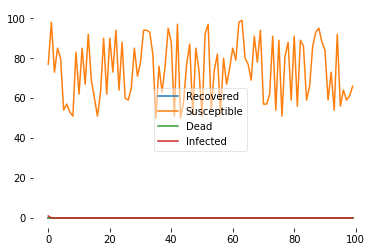

xxxxxx t, Total= 0.0 7422


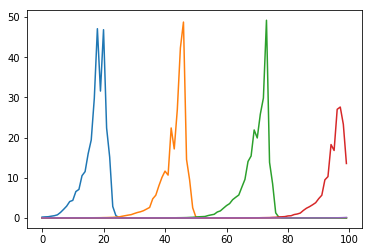

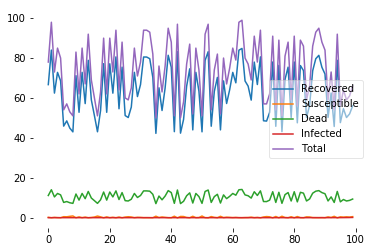

This plot has distance on the horizontal axis
Time: 250.0099999999176
Total Population:  7412.146913484373
Total Deaths:      1055.6864931235061
Total Infected:    0.3653085803812485
Total Recovered:   6334.118958741013


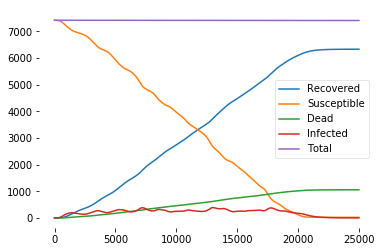

This plot has time on the horizontal axis


In [11]:
# SIR model showing progression of disease through a population 
# to be modeled on an annealing quantum computer

#
#    @2020 Alex Khan. All rights reserved
#    
#    This model is not indented to accurately predict or simulate real results
#    the goal is to create a simplifed version that can then be modeled on
#    an annealing quantum computer through a QUBO

#    This code simulates the movement of the disease over a distance x[0] to x[end]

#    Acknowledgements:
#    The original formula and code was taken from 
#    https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
#    The SIR model differential equations:
#    def deriv(y, t, N, beta, gamma):
#    S, I, R = y
#    dSdt = -beta * S * I / N
#    dIdt = beta * S * I / N - gamma * I
#    dRdt = gamma * I
#    return dSdt, dIdt, dRdt
#    equations describing this model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)

#    More information on the formula and code is described 
#    by David Smith and Lang Moore
#    and can be found at:
#    https://www.maa.org/book/export/html/115606

#    An interesting simulation and models can be found at:    
#    https://gabgoh.github.io/COVID/index.html
#    https://python.quantecon.org/sir_model.html


import numpy as np
import matplotlib.pyplot as plt
import random
end=100
x = [0] * (end)


#### Change the time scale and time steps
tend=250
dt=.01
t=0.0


### Printing settings
nPlots=5
printwhen=tend/dt/nPlots
printnow=0


Nper0 = 100
Ninf0 = 1


# Total population, N.
# If not using random population
# Initialize Population per x
N = [Nper0] * (end)

# If using random population
N = [random.randint(50, Nper0) for x in range(0,end)]

#for ii in range (0,end):
#    print(ii,N[ii])
    
# If using pattern population
#for kk in range (0,40):
#    N[kk]=100
#for kk in range (41,60):
#    N[kk]=100
#for kk in range (61, 100):
#    N[kk]=100

#S=N # This caused problems. Code changes N, based on changes to S.
for ii in range (0,end):
    S[ii]=N[ii]


# Initial number of infected and recovered individuals, I0 and R0.
R = [0] * (end)
I = [0] * (end)
D = [0] * (end)
T = [0] * (end)

Rt=[]
St=[]
Dt=[]
It=[]
Tt=[]
# Everyone else, S0, is susceptible to infection initially.
#S0 = N - I0 - R0

# Where does the infection start
## comment if using random population
#S = [Nper0-Ninf0] * (end)

I[0]=Ninf0
S[0]=N[0]-Ninf0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.005, 0.06
delta=0.01
transfer_rate=0.0004


def fdSdt(S,I,N):
    #if N==0:
    #    return(0)
    return(-beta * S * I)
    #return(-beta * S * I/N)
    

def fdSdt_tr(S,I,N):
    #if N==0:
    #    return(0)
    return(-transfer_rate * S * I)
    #return(-transfer_rate * S * I/N)

def fdIdt(S,I,N):
    #if N==0:
    #    return(0)
    return(beta * S * I  - gamma * I- delta * I)
    #return(beta * S * I/N  - gamma * I- delta * I)

def fdIdt_tr(S,I,N):
    #if N==0:
    #    return(0)
    return(transfer_rate * S * I )
    #return(transfer_rate * S * I/N )
    
# number recovered 
def fdRdt(I):
    return(gamma * I)
    
# total count check
def fT(S, I, R, D):
    return(S+I+R+D)

def fDdt(I):
    return(delta*I)
    

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(R, label='Recovered')
ax.plot(S, label='Susceptible')
ax.plot(D, label='Dead')
ax.plot(I, label='Infected')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#print('total:',int(N[0]),'susceptible:',int(S[0]),'infected:',int(I[0]),'recovered:',int(R[0]), 'dead:',int(D[0]))
Tstart=np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D)
print('xxxxxx t, Total=',t,Tstart)
while t<tend:
    #print('======= At time=',t)
    # Run forward through the population
    for x in range (0,end):   
        #print('--- new x',x, S[x],I[x],R[x],dt)
        #print(x, N[x], S[x])
        if N[x]>0:
            if x==0:
                
                S[x]=(S[x]+fdSdt(S[x],I[x],N[x])*dt
                          +fdSdt_tr(S[x+1],I[x+1],N[x+1])*dt)
                #print(' S',S[x])
                I[x]=(I[x]+fdIdt(S[x],I[x],N[x])*dt
                          +fdIdt_tr(S[x+1],I[x+1],N[x+1])*dt)
                #print(' x',x,'trans',trans_rate*fdIdt(S[x+1],I[x+1],N[x+1])*dt)
                #print(' I',I[x])
                R[x]=R[x]+fdRdt(I[x])*dt
                #print(' R',R[x])
                D[x]=D[x]+fDdt(I[x])*dt
                #print(' D',D[x])
                #N[x]=N[x]-fDdt(I[x])*dt
                #print(' N',N[x])
                #if N[x]<0:
                #    N[x]=0
                #I[x]=I[x]-fDdt(I[x])*dt
                #print(' I',I[x])
            elif x==end-1:
                
                S[x]=(S[x]+fdSdt(S[x],I[x],N[x])*dt
                          +fdSdt_tr(S[x-1],I[x-1],N[x-1])*dt)
                #print(S[n])
                I[x]=(I[x]+fdIdt(S[x],I[x],N[x])*dt
                          +fdIdt_tr(S[x-1],I[x-1],N[x-1])*dt)
                #print(' x',x,'trans', trans_rate*fdIdt(S[x-1],I[x-1],N[x-1])*dt)
                #print(' I',I[x])
                R[x]=R[x]+fdRdt(I[x])*dt
                #print(' R',R[x])
                D[x]=D[x]+fDdt(I[x])*dt
                #print(' D',D[x])
                #N[x]=N[x]-fDdt(I[x])*dt
                #print(' N',N[x])
                #if N[x]<0:
                #    N[x]=0
                #I[x]=I[x]-fDdt(I[x])*dt
                #print(' I',I[x])
            else:
                
                S[x]=(S[x]+fdSdt(S[x],I[x],N[x])*dt
                          +fdSdt_tr(S[x+1],I[x+1],N[x+1])*dt
                          +fdSdt_tr(S[x-1],I[x-1],N[x-1])*dt)
                #print('x=',x,I[x])
                I[x]=(I[x]+fdIdt(S[x],I[x],N[x])*dt
                          +fdIdt_tr(S[x+1],I[x+1],N[x+1])*dt
                          +fdIdt_tr(S[x-1],I[x-1],N[x-1])*dt)
                #print(' x',x,'trans', trans_rate*fdIdt(S[x+1],I[x+1],N[x+1])*dt
                #          +trans_rate*fdIdt(S[x-1],I[x-1],N[x-1])*dt)
                #print(' I',I[x])
                R[x]=R[x]+fdRdt(I[x])*dt
                #print(' R',R[x])
                D[x]=D[x]+fDdt(I[x])*dt
                #print(' D',D[x])
                #N[x]=N[x]-fDdt(I[x])*dt
                #print(' N',N[x])
                #if N[x]<0:
                #    N[x]=0
                #I[x]=I[x]-fDdt(I[x])*dt 
                #print(' I',I[x])
                #if I[x]>100:
                #if x==50:
                #    print(I[50])
                #    print(' x=',x, 'total N:',int(N[x]), 'Total SIRD', np.sum(S)+sum(I)+sum(R)+sum(D),'susceptible:',S[x],'infected:',I[x],'diff', S[x]-I[x],'recovered:',R[x], 'dead:',D[x])
                #print(' x=',x, 'total N:',int(N[x]), 'Total', np.sum(S)+sum(I)+sum(R)+sum(D),'susceptible:',int(S[x]),'infected:',int(I[x]),'recovered:',int(R[x]), 'dead:',int(D[x]))
    #print('total:',int(N[1]),'susceptible:',int(S[1]),'infected:',int(I[1]),'recovered:',int(R[1]), 'dead:',int(D[1]))        
    # Run backwards through the population
    for x in range (end-1,-1,-1):   
        #print(n, S[n],I[n],R[n],dt)
        #print(x, N[x], S[x])
        if N[x]>0:
            if x==0:
                
                S[x]=(S[x]+fdSdt(S[x],I[x],N[x])*dt
                          +fdSdt_tr(S[x+1],I[x+1],N[x+1])*dt)
                #print(S[n])
                I[x]=(I[x]+fdIdt(S[x],I[x],N[x])*dt
                          +fdIdt_tr(S[x+1],I[x+1],N[x+1])*dt)
                R[x]=R[x]+fdRdt(I[x])*dt
                D[x]=D[x]+fDdt(I[x])*dt
                #N[x]=N[x]-fDdt(I[x])*dt
                #if N[x]<0:
                #    N[x]=0
                #I[x]=I[x]-fDdt(I[x])*dt
            elif x==end-1:
                
                S[x]=(S[x]+fdSdt(S[x],I[x],N[x])*dt
                          +fdSdt_tr(S[x-1],I[x-1],N[x-1])*dt)
                #print(S[n])
                I[x]=(I[x]+fdIdt(S[x],I[x],N[x])*dt
                          +fdIdt_tr(S[x-1],I[x-1],N[x-1])*dt)
                R[x]=R[x]+fdRdt(I[x])*dt
                D[x]=D[x]+fDdt(I[x])*dt
                #N[x]=N[x]-fDdt(I[x])*dt
                #if N[x]<0:
                #    N[x]=0
                #I[x]=I[x]-fDdt(I[x])*dt
            else:
                
                S[x]=(S[x]+fdSdt(S[x],I[x],N[x])*dt
                          +fdSdt_tr(S[x+1],I[x+1],N[x+1])*dt
                          +fdSdt_tr(S[x-1],I[x-1],N[x-1])*dt)
                #print('x=',x,I[x])
                I[x]=(I[x]+fdIdt(S[x],I[x],N[x])*dt
                          +fdIdt_tr(S[x+1],I[x+1],N[x+1])*dt
                          +fdIdt_tr(S[x-1],I[x-1],N[x-1])*dt)
                R[x]=R[x]+fdRdt(I[x])*dt
                D[x]=D[x]+fDdt(I[x])*dt
                #N[x]=N[x]-fDdt(I[x])*dt
                #if N[x]<0:
                #    N[x]=0
                #I[x]=I[x]-fDdt(I[x])*dt 
        T[x]=S[x]+I[x]+R[x]+D[x]
        #S[x]=fS(I[x],R[x],N[x])
    Tt.append(np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D))
    St.append(np.sum(S))
    It.append(np.sum(I))
    Rt.append(np.sum(R))
    Dt.append(np.sum(D))
    
    #print('xxxxxx t, Total=',t,Tend, 'Difference=',Tmid-Tstart, 'Deaths', np.sum(D))
    #print('total:',int(N[1]),'susceptible:',int(S[1]),'infected:',int(I[1]),'recovered:',int(R[1]), 'dead:',int(D[1]))            
    #print(printnow)
    if (printnow==printwhen):
        
        plt.plot(I)
        
        printnow=0
    printnow+=1
    t+=dt
Tend=np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D)
#print('xxxxxx t, Total=',t,Tend, 'Difference=',Tend-Tstart, 'Deaths', np.sum(D))
    #print('xxxxxx t, Total=',t,np.sum(S)+sum(I)+sum(R)+sum(D))
plt.show()   
# Plot    
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(R, label='Recovered')
ax.plot(S, label='Susceptible')
ax.plot(D, label='Dead')
ax.plot(I, label='Infected')
ax.plot(T, label='Total')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
print('This plot has distance on the horizontal axis')
print('Time:', t)
print('Total Population: ', Tend)
print('Total Deaths:     ', np.sum(D))
print('Total Infected:   ', np.sum(I))
print('Total Recovered:  ', np.sum(R))


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(Rt, label='Recovered')
ax.plot(St, label='Susceptible')
ax.plot(Dt, label='Dead')
ax.plot(It, label='Infected')
ax.plot(Tt, label='Total')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
print('This plot has time on the horizontal axis')

# A grid of time points (in days)
#t = np.linspace(0, 160, 160)
# Plot the data on three separate curves for S(t), I(t) and R(t)
#fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
#ax = fig.add_subplot(111, axisbelow=True)
#ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
#ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
#ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
#ax.set_xlabel('Time /days')
#ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
#ax.yaxis.set_tick_params(length=0)
#ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
#legend = ax.legend()
#legend.get_frame().set_alpha(0.5)
#for spine in ('top', 'right', 'bottom', 'left'):
#    ax.spines[spine].set_visible(False)
#plt.show()

In [4]:
# Terminal Commands
dim=50
Run_Dwave(Build_Q(dim))

{('a0', 'a0'): 0.9935592211857478, ('a1', 'a1'): 0.8243097144023215, ('a2', 'a2'): 0.8946045654852663, ('a3', 'a3'): 0.26996122828612457, ('a4', 'a4'): 0.35581124995885105, ('a5', 'a5'): 0.9117843838008193, ('a6', 'a6'): 0.2776214314254366, ('a7', 'a7'): 0.975027812425818, ('a8', 'a8'): 0.10584982540129761, ('a9', 'a9'): 0.9880635223069458, ('a10', 'a10'): 0.03433437341126533, ('a11', 'a11'): 0.06954035175641105, ('a12', 'a12'): 0.3991573839944653, ('a13', 'a13'): 0.7404129446745973, ('a14', 'a14'): 0.7650569883858673, ('a15', 'a15'): 0.5414885423598359, ('a16', 'a16'): 0.4494588109675457, ('a17', 'a17'): 0.31728474019192654, ('a18', 'a18'): 0.8461502183108611, ('a19', 'a19'): 0.6979528231829504, ('a20', 'a20'): 0.9180173960563072, ('a21', 'a21'): 0.703240550511329, ('a22', 'a22'): 0.06798483958720158, ('a23', 'a23'): 0.6422307393840603, ('a24', 'a24'): 0.13088379206020395, ('a25', 'a25'): 0.6582435734361867, ('a26', 'a26'): 0.10898082594870973, ('a27', 'a27'): 0.724308767593322, ('a28

   a0 a1 a10 a11 a12 a13 a14 a15 a16 a17 a18 a19 ... a9    energy num_oc. ...
0   1  0   1   0   0   0   0   1   0   1   1   0 ...  0 -10.305953       1 ...
1   0  1   1   0   1   1   1   1   1   1   1   0 ...  0 -9.163444       1 ...
81  1  1   1   0   1   1   1   1   1   0   1   0 ...  0 -9.074033       1 ...
2   0  0   1   0   1   1   1   1   1   1   1   1 ...  1 -7.045265       1 ...
98  0  1   0   1   1   1   0   1   1   0   1   0 ...  1 -6.773732       1 ...
3   0  0   1   1   1   1   0   1   1   0   1   0 ...  0  -6.69413       1 ...
4   0  1   1   1   1   1   0   1   1   0   1   1 ...  1 -6.581866       1 ...
5   0  0   1   0   0   1   1   0   1   1   0   0 ...  0  -6.40081       1 ...
6   0  1   1   0   1   1   1   1   1   1   1   0 ...  1 -6.216068       1 ...
7   0  0   1   1   1   1   1   1   0   0   1   0 ...  1 -5.895773       1 ...
8   0  1   1   1   1   1   0   1   1   1   1   0 ...  0 -5.850268       1 ...
83  0  0   1   1   1   0   1   1   0   0   1   0 ...  1 -5.6758